#### Part 26: More Visualization Techniques in Pandas

In this notebook, we'll explore additional visualization techniques in pandas, including:
- Hexagonal bin plots with custom aggregation
- Pie charts
- Working with multiple axes
- Time series plotting customizations

##### Setup
First, let's import the necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set the plotting style
plt.style.use('ggplot')

# Make plots appear in the notebook
%matplotlib inline

##### 1. Hexagonal Bin Plots with Custom Aggregation

Hexagonal bin plots are useful for visualizing the density of points in a scatter plot, especially when there are many points. You can customize the aggregation function used for the bins:

<Axes: title={'center': 'Hexbin with Custom Aggregation (Max)'}, xlabel='a', ylabel='b'>

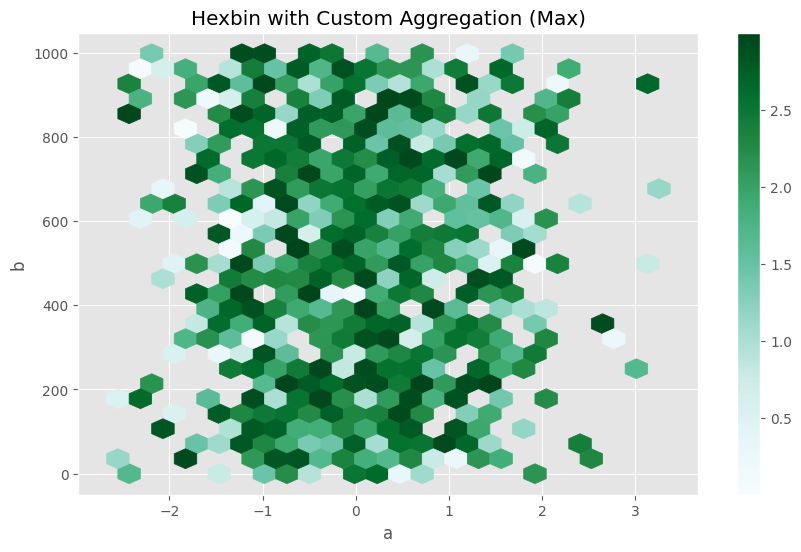

In [2]:
# Create a DataFrame for hexbin plot
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df['b'] = df['b'] + np.arange(1000)  # Add a trend to 'b'
df['z'] = np.random.uniform(0, 3, 1000)  # Add a column for color mapping

# Create a hexbin plot with custom aggregation
df.plot.hexbin(x='a', y='b', C='z', reduce_C_function=np.max, gridsize=25, 
               figsize=(10, 6), title='Hexbin with Custom Aggregation (Max)')

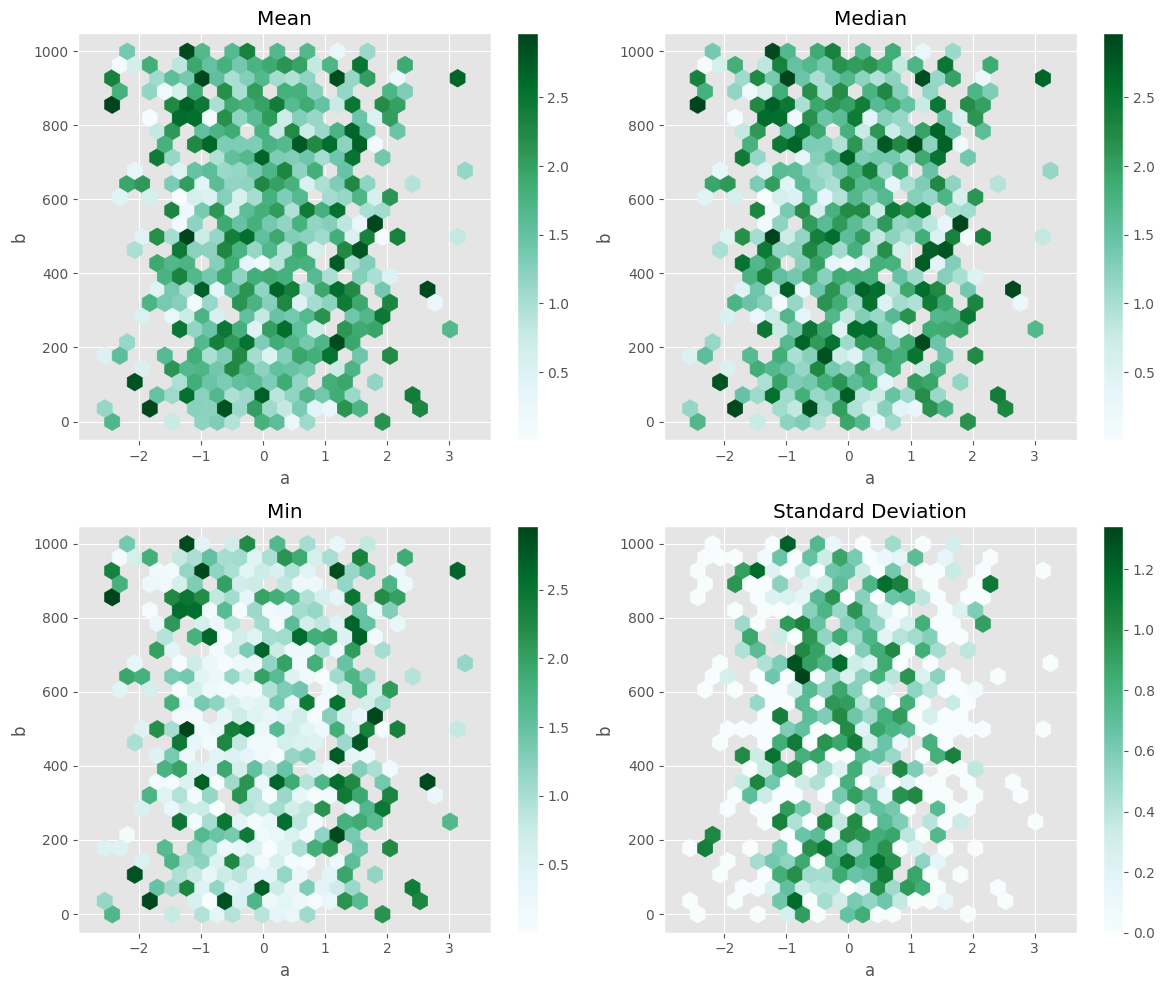

In [3]:
# Try different aggregation functions
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
df.plot.hexbin(x='a', y='b', C='z', reduce_C_function=np.mean, gridsize=25, 
               title='Mean', ax=axes[0, 0])
df.plot.hexbin(x='a', y='b', C='z', reduce_C_function=np.median, gridsize=25, 
               title='Median', ax=axes[0, 1])
df.plot.hexbin(x='a', y='b', C='z', reduce_C_function=np.min, gridsize=25, 
               title='Min', ax=axes[1, 0])
df.plot.hexbin(x='a', y='b', C='z', reduce_C_function=np.std, gridsize=25, 
               title='Standard Deviation', ax=axes[1, 1])
plt.tight_layout()

##### 2. Pie Charts

Pie charts are useful for showing the proportion of categories in a dataset:

<Axes: title={'center': 'Pie Chart from Series'}, ylabel='series'>

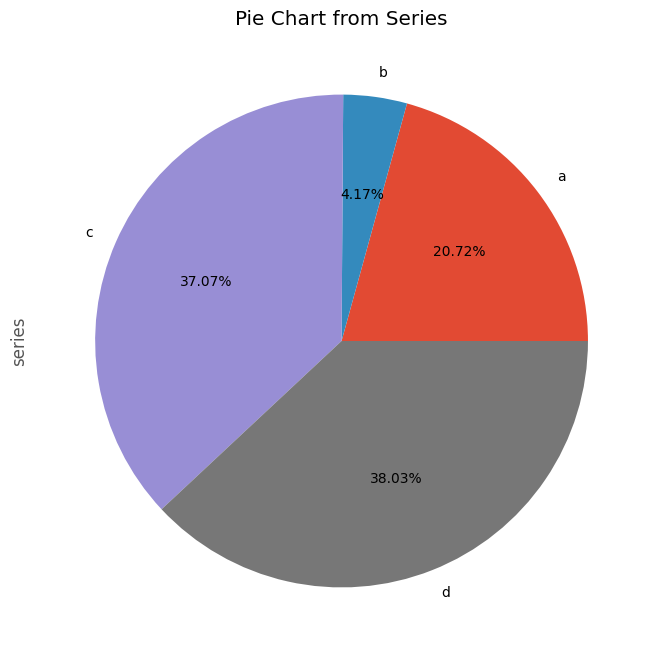

In [4]:
# Create a Series for a pie chart
series = pd.Series(3 * np.random.rand(4), 
                  index=['a', 'b', 'c', 'd'], 
                  name='series')

# Create a pie chart
series.plot.pie(figsize=(8, 8), autopct='%.2f%%', title='Pie Chart from Series')

For pie plots, it's best to use square figures, i.e., a figure with an aspect ratio of 1. You can create the figure with equal width and height, or force the aspect ratio to be equal after plotting by calling `ax.set_aspect('equal')` on the returned axes object.

When creating pie charts from a DataFrame, you need to either specify a target column with the `y` argument or set `subplots=True` to create multiple pie charts:

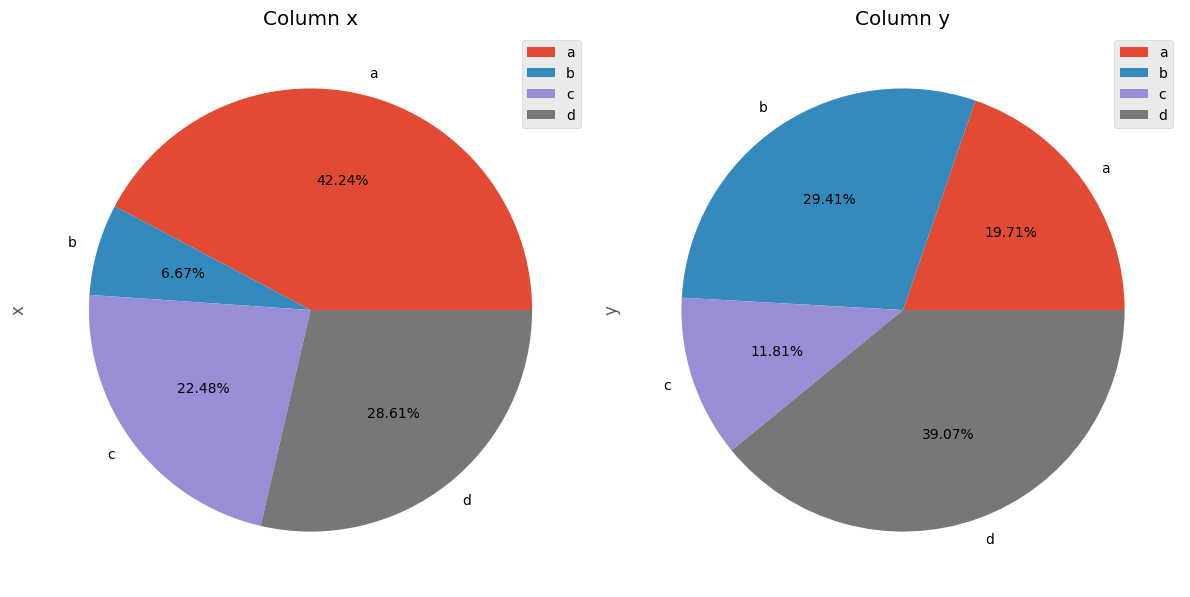

In [5]:
# Create a DataFrame for pie charts
df = pd.DataFrame(3 * np.random.rand(4, 2),
                 index=['a', 'b', 'c', 'd'], 
                 columns=['x', 'y'])

# Create pie charts as subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
df.plot.pie(y='x', ax=axes[0], autopct='%.2f%%', title='Column x')
df.plot.pie(y='y', ax=axes[1], autopct='%.2f%%', title='Column y')
plt.tight_layout()

array([<Axes: ylabel='x'>, <Axes: ylabel='y'>], dtype=object)

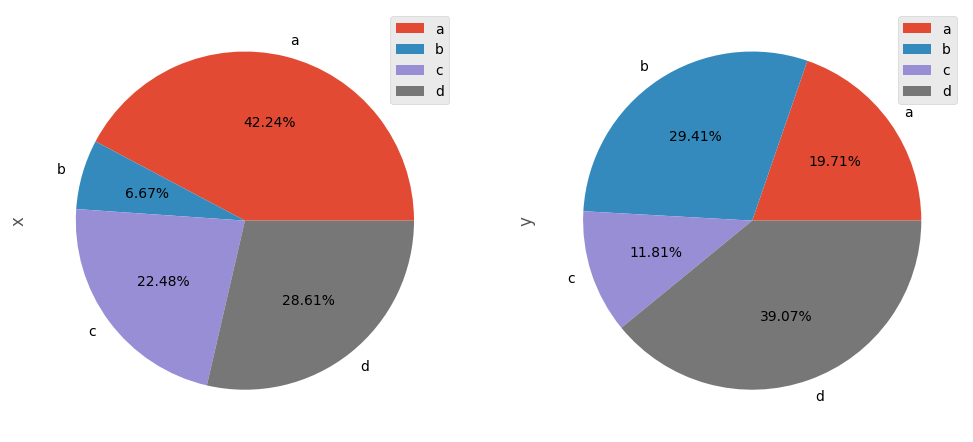

In [6]:
# Alternative: Create pie charts with subplots=True
df.plot.pie(subplots=True, figsize=(12, 6), autopct='%.2f%%')

##### 3. Working with Multiple Axes

When you have variables with different scales, it can be useful to plot them on different y-axes:

Text(0, 0.5, 'B')

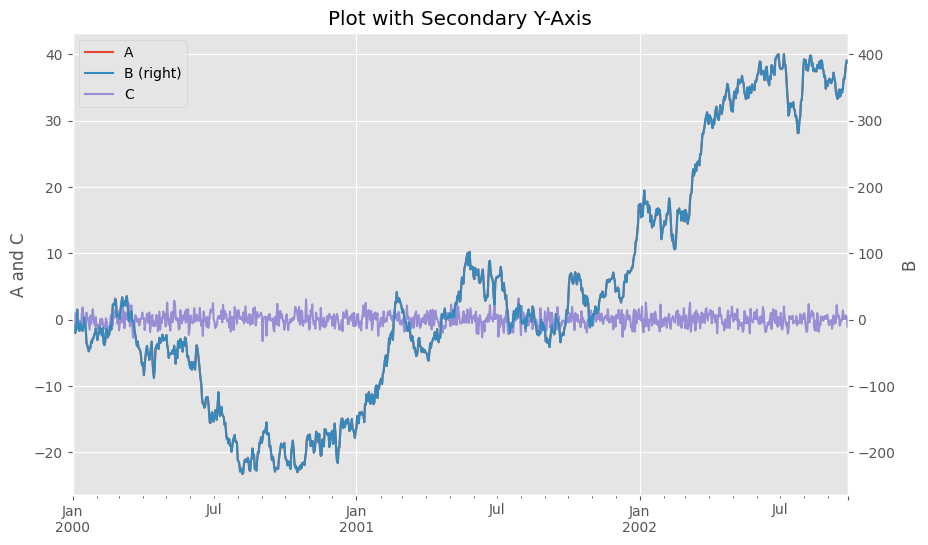

In [7]:
# Create a DataFrame for multiple axes
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
df = pd.DataFrame({
    'A': ts.cumsum(),  # Cumulative sum - will have larger values
    'B': ts.cumsum() * 10,  # Even larger values
    'C': np.random.randn(1000)  # Small values around 0
})

# Plot with secondary y-axis
ax = df.plot(secondary_y=['B'], figsize=(10, 6), title='Plot with Secondary Y-Axis')
ax.set_ylabel('A and C')
ax.right_ax.set_ylabel('B')

You can specify multiple columns to be plotted on the secondary y-axis:

Text(0, 0.5, 'A and B')

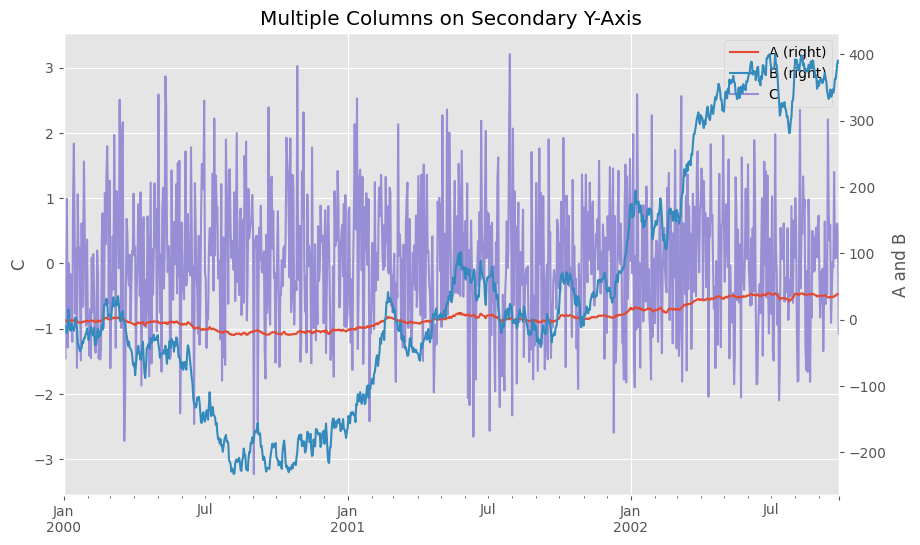

In [8]:
# Plot with multiple columns on secondary y-axis
ax = df.plot(secondary_y=['A', 'B'], figsize=(10, 6), 
             title='Multiple Columns on Secondary Y-Axis')
ax.set_ylabel('C')
ax.right_ax.set_ylabel('A and B')

By default, the secondary y-axis has a label with the suffix "(right)", but you can turn it off:

<Axes: title={'center': 'Without "(right)" Suffix'}>

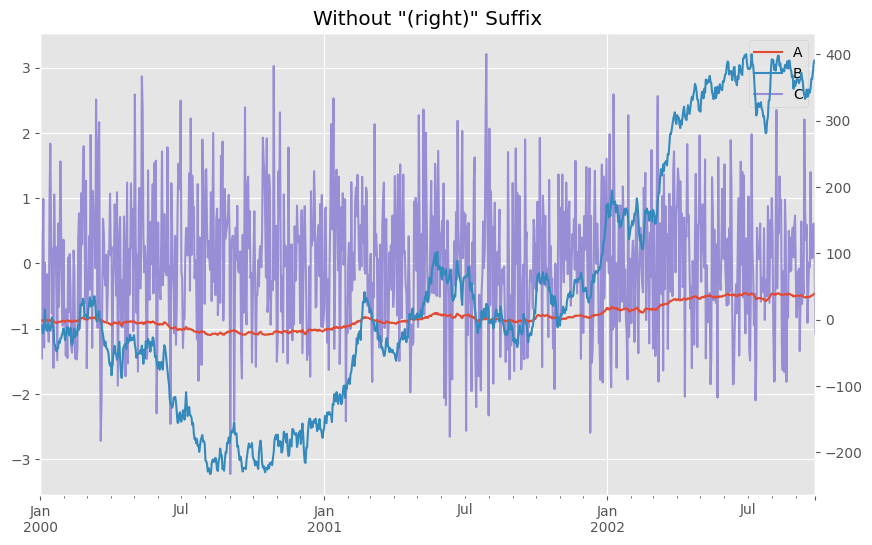

In [9]:
# Plot without the "(right)" suffix
df.plot(secondary_y=['A', 'B'], mark_right=False, figsize=(10, 6), 
        title='Without "(right)" Suffix')

##### 4. Time Series Plotting Customizations

Pandas provides custom formatters for time series plots. These change the formatting of the axis labels for dates and times.

### 4.1 Suppressing Tick Resolution Adjustment

Pandas includes automatic tick resolution adjustment for regular frequency time-series data. You can suppress this behavior using the `x_compat` parameter:

<Axes: title={'center': 'Default Time Series Plot'}>

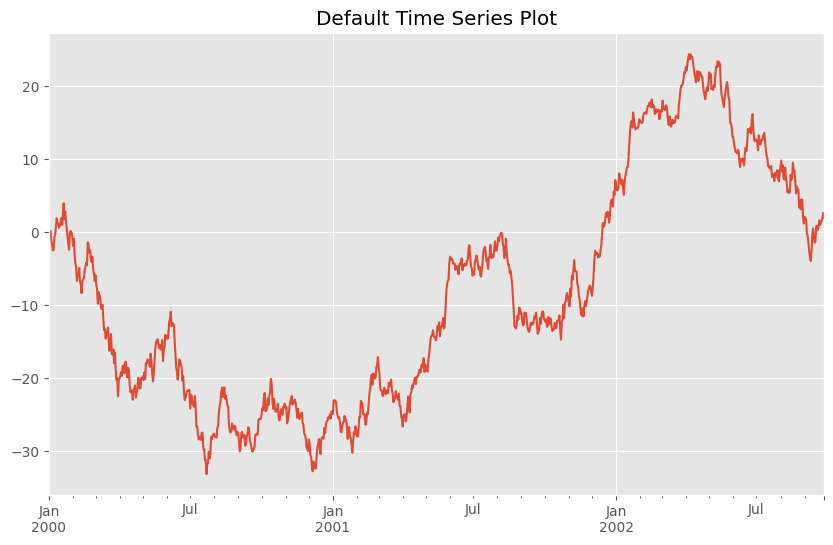

In [10]:
# Create a time series DataFrame
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
df = pd.DataFrame({
    'A': ts.cumsum(),
    'B': ts.cumsum() + 10,
    'C': ts.cumsum() - 10
})

# Default behavior
plt.figure(figsize=(10, 6))
df['A'].plot(title='Default Time Series Plot')

<Axes: title={'center': 'Time Series Plot with x_compat=True'}>

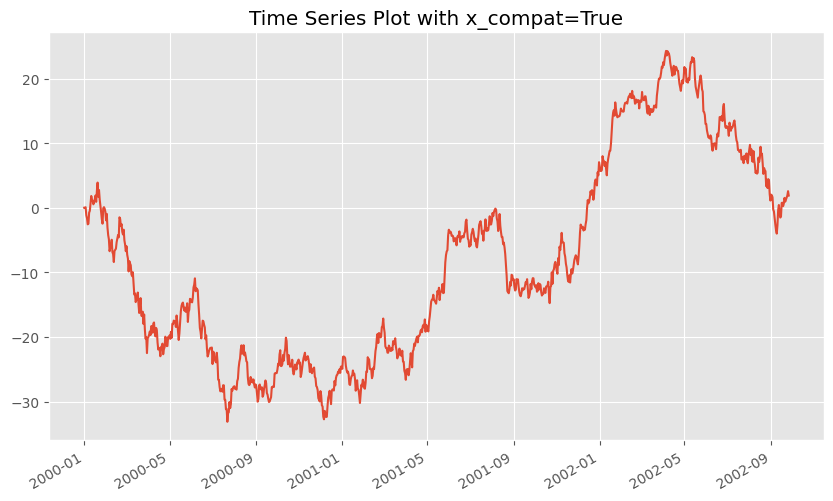

In [11]:
# Suppress tick resolution adjustment
plt.figure(figsize=(10, 6))
df['A'].plot(x_compat=True, title='Time Series Plot with x_compat=True')

If you have more than one plot that needs to be suppressed, you can use the `use` method in `pandas.plotting.plot_params` with a `with` statement:

Text(0.5, 1.0, 'Multiple Time Series with Suppressed Tick Resolution')

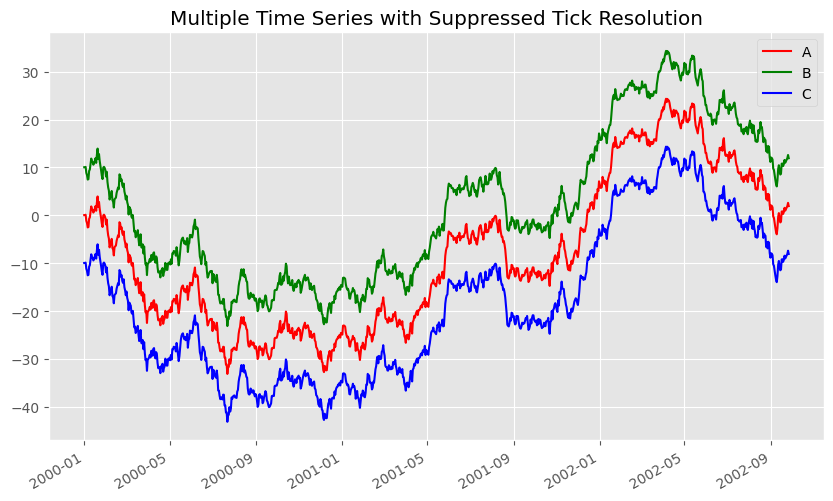

In [12]:
# Suppress tick resolution adjustment for multiple plots
plt.figure(figsize=(10, 6))
with pd.plotting.plot_params.use('x_compat', True):
    df['A'].plot(color='r', label='A')
    df['B'].plot(color='g', label='B')
    df['C'].plot(color='b', label='C')
plt.legend()
plt.title('Multiple Time Series with Suppressed Tick Resolution')

### 4.2 Automatic Date Tick Adjustment

For time series plots with overlapping tick labels, you can use matplotlib's `autofmt_xdate` method to automatically format the x-axis date ticks:

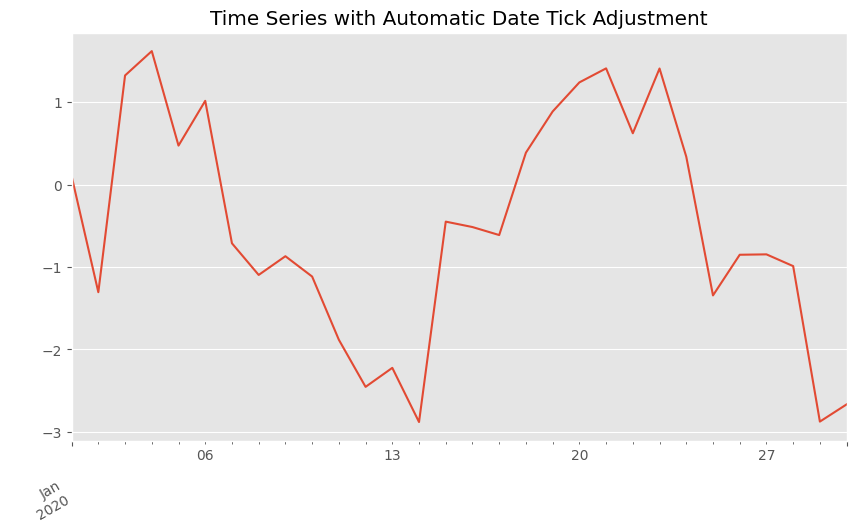

In [13]:
# Create a time series with daily data
daily = pd.Series(np.random.randn(30), 
                 index=pd.date_range('1/1/2020', periods=30, freq='D'))
daily = daily.cumsum()

# Create a figure and plot
fig, ax = plt.subplots(figsize=(10, 6))
daily.plot(ax=ax, title='Time Series with Automatic Date Tick Adjustment')

# Automatically format the x-axis date ticks
fig.autofmt_xdate()

##### 5. Creating Custom Plots

You can create custom plots by combining pandas plotting with matplotlib's object-oriented interface:

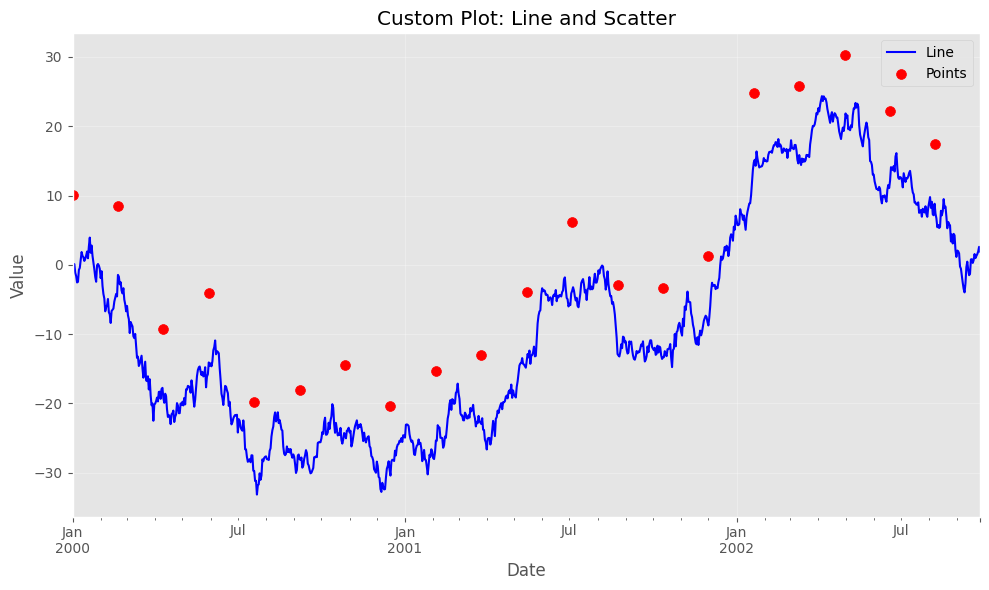

In [14]:
# Create a custom plot with a line plot and a scatter plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a line
df['A'].plot(ax=ax, style='b-', label='Line')

# Add a scatter plot on the same axes
ax.scatter(df.index[::50], df['B'][::50], color='r', s=50, label='Points')

# Customize the plot
ax.set_title('Custom Plot: Line and Scatter')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.grid(True, alpha=0.3)
ax.legend()

plt.tight_layout()

##### Summary

In this notebook, we've explored additional visualization techniques in pandas, including:

1. Hexagonal bin plots with custom aggregation functions
2. Pie charts for both Series and DataFrame data
3. Working with multiple axes for variables with different scales
4. Time series plotting customizations, including:
   - Suppressing tick resolution adjustment
   - Automatic date tick adjustment
5. Creating custom plots by combining pandas plotting with matplotlib

These visualization techniques provide powerful tools for exploring and presenting your data effectively.